# Code Example: Visualizing Conditional Distributions of One Variable

The following code generates charts showing the how conditioning removes possible variable combinations, and then they are rescaled into a new probability distribution.
Take a look at the charts first -- understand how the distribution changes is more important than the code.

Text(0, 0.5, 'probability')

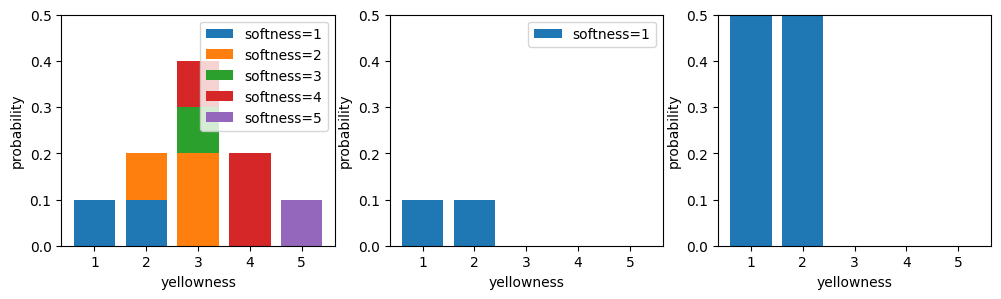

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)

yellowness_values = sorted(set(r[0] for r in mango_data))
softness_values = sorted(set(r[1] for r in mango_data))
cumulative_probabilities = np.asarray([0.0 for _ in yellowness_values])

plt.gca().set_ylim((0, 0.5))
for s in softness_values:
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    plt.bar(yellowness_values,
            current_probabilities,
            label=f"softness={s}",
            bottom=cumulative_probabilities)

    cumulative_probabilities += current_probabilities
plt.xlabel("yellowness")
plt.ylabel("probability")
plt.legend()

plt.subplot(1, 3, 2)

plt.gca().set_ylim((0, 0.5))
for s in [1]:
    current_probabilities = [mango_distribution.get((y, s), 0.0) for y in yellowness_values]
    plt.bar(yellowness_values,
            current_probabilities,
            label=f"softness={s}")

plt.xlabel("yellowness")
plt.ylabel("probability")
plt.legend()

plt.subplot(1, 3, 3)

plt.gca().set_ylim((0, 0.5))
yellowness_distribution = build_conditional_from_distribution(mango_distribution, lambda r: r[1] == 1)
plt.bar(yellowness_values, [yellowness_distribution.get((y, 1), 0) for y in yellowness_values])
plt.xlabel("yellowness")
plt.ylabel("probability")

**Chart Notes:**
* The left chart is a repeat from looking at marginal distributions of the same data, showing the histograms by yellowness with the bars also broken up by softness.
* The middle chart is conditioned (filtered) to only show `softness=1` still using the probabilities of the original distribution.
* The right chart shows the distribution rescaled by dividing by the condition probability, so the probabilities add up to one correctly.